## <font color= Blue> LENDING CLUB CASE STUDY
    
By SAMREEN AABADIRAJA (Advance certification NLP)

### <font color= RED>OBJECTIVE
From the data set given the aim of this study is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [89]:
# Importing all necessary Libreries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [90]:
#Loading loan.csv sahred as a pandas dataframe
original_loan_df = pd.read_csv(r'Input_data\loan.csv',dtype= 'unicode')
# total no.of Rows and columns in the dataframe i.e shape
print (original_loan_df.shape)

(39717, 111)


### <font color= Orange> Observation: 
It can be seen that the original loan dataframe has 111 columns and 39717 rows out of which columns and rows necessary for the given objective must be identified and data studied. Subsequent steps are done to understand which columns are useful for the analysis

In [91]:
#first 15 rows
print(original_loan_df.head(15)) ##Printing to reduce memory

         id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0   1077501   1296599      5000        5000            4975   36 months   
1   1077430   1314167      2500        2500            2500   60 months   
2   1077175   1313524      2400        2400            2400   36 months   
3   1076863   1277178     10000       10000           10000   36 months   
4   1075358   1311748      3000        3000            3000   60 months   
5   1075269   1311441      5000        5000            5000   36 months   
6   1069639   1304742      7000        7000            7000   60 months   
7   1072053   1288686      3000        3000            3000   36 months   
8   1071795   1306957      5600        5600            5600   60 months   
9   1071570   1306721      5375        5375            5350   60 months   
10  1070078   1305201      6500        6500            6500   60 months   
11  1069908   1305008     12000       12000           12000   36 months   
12  1064687   1298717    

In [92]:
#last 15 rows
print(original_loan_df.tail(15)) ###Printing to reduce memory

          id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
39702  96350     96338      5000        5000             850   36 months   
39703  94838     73673      3000        3000            2550   36 months   
39704  93277     93254      3000        3000             950   36 months   
39705  93061     93057      5000        5000             250   36 months   
39706  92676     92671      5000        5000             150   36 months   
39707  92666     92661      5000        5000             525   36 months   
39708  92552     92542      5000        5000             375   36 months   
39709  92533     92529      5000        5000             675   36 months   
39710  92507     92502      5000        5000             250   36 months   
39711  92402     92390      5000        5000             700   36 months   
39712  92187     92174      2500        2500            1075   36 months   
39713  90665     90607      8500        8500             875   36 months   
39714  90395

### <font color= Orange> Observation:<font color=Orange>  
Looking randomly at the dataframe by the reading the csv, head, tail, loc etc. there are a lot cloumns with NAN and same values avialble. Deeper check is needed to take a call to drop them 

#### <font color= DarkBlue>EDA on the loan Dataframe:
To Understand import features and stats which can help identify potential defaulters
    
Looking at the columns, rows which has nan or no unique entries

In [93]:
## All column details (datatype, Content count and name)
print(original_loan_df.info(verbose=True,show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              39717 non-null  object
 1    member_id                       39717 non-null  object
 2    loan_amnt                       39717 non-null  object
 3    funded_amnt                     39717 non-null  object
 4    funded_amnt_inv                 39717 non-null  object
 5    term                            39717 non-null  object
 6    int_rate                        39717 non-null  object
 7    installment                     39717 non-null  object
 8    grade                           39717 non-null  object
 9    sub_grade                       39717 non-null  object
 10   emp_title                       37258 non-null  object
 11   emp_length                      38642 non-null  object
 12   home_ownership                

In [94]:
# Counting unique entries in each column and rows)
pd.set_option('display.max_rows',None)
print ("Unique entries in all columns:\n",original_loan_df.nunique(),sep='')
print ("\n\nMaximum Unique entries in a Row from all Rows:",original_loan_df.nunique(axis=1).max())

Unique entries in all columns:
id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti      

In [95]:
# Check to see blank rows
print('Empty Rows:', original_loan_df.isnull().all(axis=1).sum())

# Check to see blank columns
print('Empty Columns:',original_loan_df.isnull().all(axis=0).sum())


Empty Rows: 0
Empty Columns: 54


### <font color= Orange> Observation:<font color=Orange>  
1. From above analysis it is clear that many columns have entries like NA, NAN etc for all rows. They can be dropped as these entries will not help in achieving the objectives
2. Many Colums have a single unique entry like 0 or INDIVIDUAL (for application type). The dimensions of the dataframe can be reduced by dropping them or storing them as seperate variables
3. As there are 39717 unique entries in member id that means there are no repetation in members, and also 39717 ids are unique and hence there are no duplicate entries for any rows
4. There are no blank rows

In [96]:
# To remove blank columns and create a new dataframe
filtered_loan_df=original_loan_df.dropna(axis=1,how='all').copy()
print(filtered_loan_df.shape)

(39717, 57)


#### <font color= DarkBlue> Object datatype needs to be looked into if it adds value to accuracy of the analysis <font color= DarkBlue>

In [97]:
pd.set_option('display.max_columns',None)
print(filtered_loan_df.head(25))

         id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0   1077501   1296599      5000        5000            4975   36 months   
1   1077430   1314167      2500        2500            2500   60 months   
2   1077175   1313524      2400        2400            2400   36 months   
3   1076863   1277178     10000       10000           10000   36 months   
4   1075358   1311748      3000        3000            3000   60 months   
5   1075269   1311441      5000        5000            5000   36 months   
6   1069639   1304742      7000        7000            7000   60 months   
7   1072053   1288686      3000        3000            3000   36 months   
8   1071795   1306957      5600        5600            5600   60 months   
9   1071570   1306721      5375        5375            5350   60 months   
10  1070078   1305201      6500        6500            6500   60 months   
11  1069908   1305008     12000       12000           12000   36 months   
12  1064687   1298717    

In [98]:
print(filtered_loan_df.describe())

             id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
count     39717     39717     39717       39717           39717       39717   
unique    39717     39717       885        1041            8205           2   
top     1077501   1296599     10000       10000            5000   36 months   
freq          1         1      2833        2741            1309       29096   

       int_rate installment  grade sub_grade emp_title emp_length  \
count     39717       39717  39717     39717     37258      38642   
unique      371       15383      7        35     28820         11   
top      10.99%      311.11      B        B3   US Army  10+ years   
freq        956          68  12020      2917       134       8879   

       home_ownership annual_inc verification_status issue_d loan_status  \
count           39717      39717               39717   39717       39717   
unique              5       5318                   3      55           3   
top              RENT      600

### <font color= Orange> Observation:
1. This analysis is mostly carried out on numeric data and for now strings are not considered, although deeper insights can be gained by analysing the description it is not used for this analysis
2. ID URL State etc dont add value to the objective hence removed
3. certain columns are metrices which are mostlikely used for tracability and log keeping of the borrower hence are neglected for the analysis 
4. additional 19 colums including ones mentioned above are removed from analysis
5. Fields are still not sedcriptive aand further cleaning is required

In [99]:
# to understand columns with single entries

for val in filtered_loan_df.columns:
    if filtered_loan_df[val].nunique()==1:
        print(filtered_loan_df[val].value_counts(dropna=False))

n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0      39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0      39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0      39678
NaN       39
Name: tax_liens, dtype: int64


### Columns which are Removed

id,member id, url - details pertaining Unique ID doesnt help to identify if a borrower is likely default 

Zip code- this categorical data can help to identify highest defaulters by state or location. But it does not help to determine objective.

desc - Sentiment analysis of the loan description by the borrower may help but it is not considered for the analysis

The below metrices are mostly used to log the loan details more than profiling 
earliest_cr_line,mths_since_last_delinq,mths_since_last_record,total_pymnt,total_pymnt_inv,
total_rec_prncp, total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d, 
last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths


Columns with mostly single entries both numerical and categorical are identified and removed

In [100]:
filtered_loan_df.drop(["id", "member_id","url","desc","zip_code", "earliest_cr_line","mths_since_last_delinq","mths_since_last_record","total_pymnt","total_pymnt_inv", "total_rec_prncp", "total_rec_int", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "last_credit_pull_d","chargeoff_within_12_mths", "tax_liens","delinq_amnt", "application_type","collections_12_mths_ex_med","initial_list_status","pymnt_plan","acc_now_delinq","policy_code"], axis = 1, inplace = True)

In [101]:
print(filtered_loan_df.shape)

(39717, 30)


In [102]:
print(filtered_loan_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   loan_amnt             39717 non-null  object
 1   funded_amnt           39717 non-null  object
 2   funded_amnt_inv       39717 non-null  object
 3   term                  39717 non-null  object
 4   int_rate              39717 non-null  object
 5   installment           39717 non-null  object
 6   grade                 39717 non-null  object
 7   sub_grade             39717 non-null  object
 8   emp_title             37258 non-null  object
 9   emp_length            38642 non-null  object
 10  home_ownership        39717 non-null  object
 11  annual_inc            39717 non-null  object
 12  verification_status   39717 non-null  object
 13  issue_d               39717 non-null  object
 14  loan_status           39717 non-null  object
 15  purpose               39717 non-null

In [103]:
print(filtered_loan_df.head())

  loan_amnt funded_amnt funded_amnt_inv        term int_rate installment  \
0      5000        5000            4975   36 months   10.65%      162.87   
1      2500        2500            2500   60 months   15.27%       59.83   
2      2400        2400            2400   36 months   15.96%       84.33   
3     10000       10000           10000   36 months   13.49%      339.31   
4      3000        3000            3000   60 months   12.69%       67.79   

  grade sub_grade                 emp_title emp_length home_ownership  \
0     B        B2                       NaN  10+ years           RENT   
1     C        C4                     Ryder   < 1 year           RENT   
2     C        C5                       NaN  10+ years           RENT   
3     C        C1       AIR RESOURCES BOARD  10+ years           RENT   
4     B        B5  University Medical Group     1 year           RENT   

  annual_inc verification_status issue_d  loan_status         purpose  \
0      24000            Verifie

In [104]:
## Imputing columns by stripping special charecters, formating types and changing column names

filtered_loan_df['int_rate_perc'] = filtered_loan_df['int_rate'].str.rstrip('%')
filtered_loan_df['revol_util_perc'] = filtered_loan_df['revol_util'].str.rstrip('%')
filtered_loan_df['term_months'] = filtered_loan_df['term'].str.rstrip('months')
filtered_loan_df['issue_d'] = pd.to_datetime(filtered_loan_df['issue_d'], format='%b-%y')
filtered_loan_df["issue_month"] = filtered_loan_df["issue_d"].dt.month
filtered_loan_df["issue_year"] = filtered_loan_df["issue_d"].dt.year
filtered_loan_df.drop(['int_rate','revol_util','term','issue_d'],inplace=True,axis=1)

In [105]:
cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc','dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_rec_late_fee', 'pub_rec_bankruptcies', 'int_rate_perc',
       'revol_util_perc', 'term_months', 'issue_month', 'issue_year']
filtered_loan_df[cols] = filtered_loan_df[cols].apply(pd.to_numeric)

In [106]:
print(filtered_loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  title                 39706 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

C:\Users\dell\AppData\Local\Temp\ipykernel_26360\2872160770.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_loan_df.corr(), vmin=0.2, annot=True, cmap='cividis')


<Axes: >

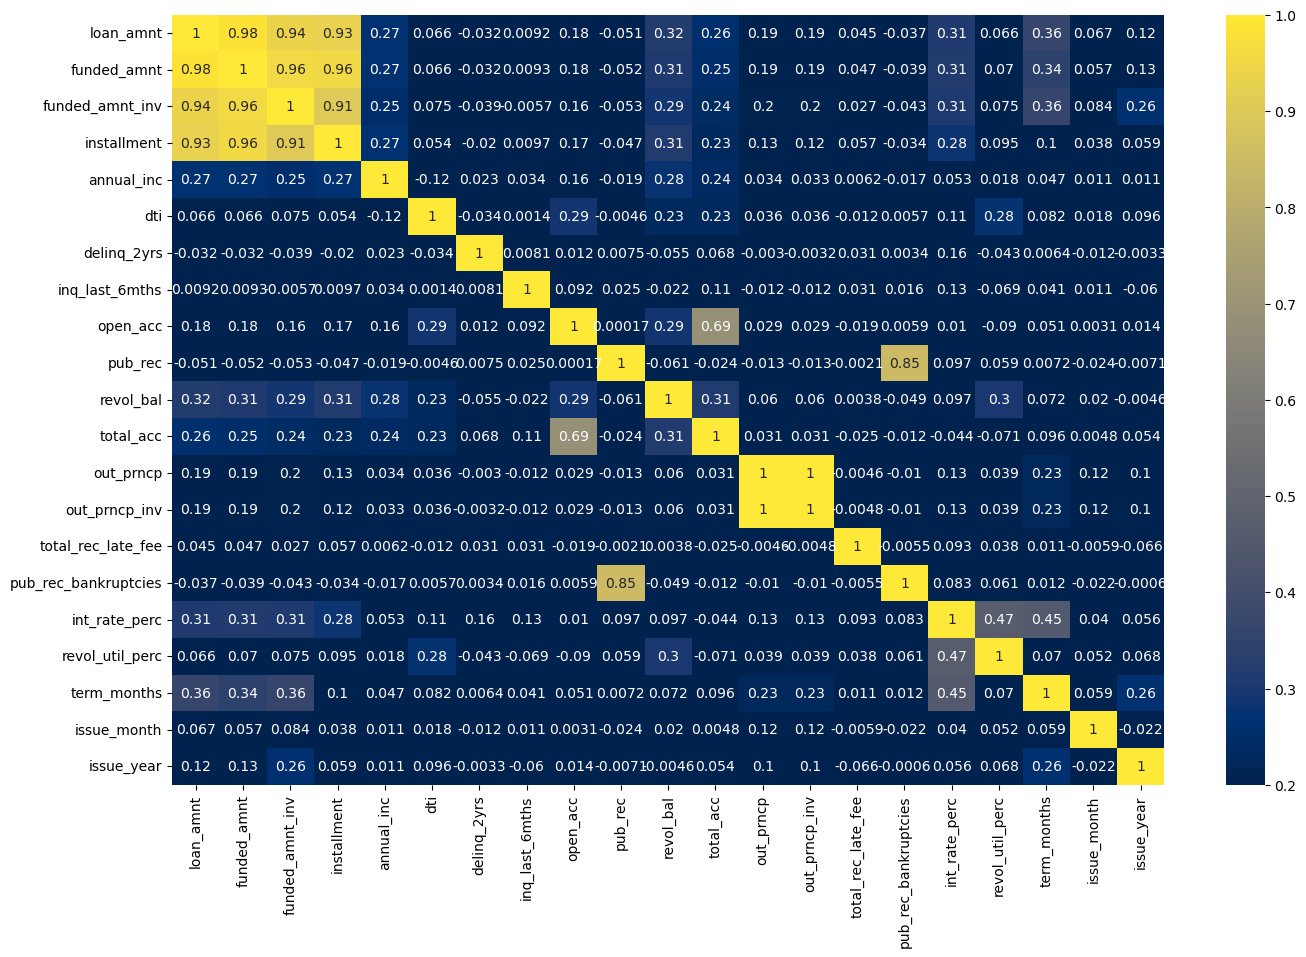

In [107]:
plt.figure(figsize=(16, 10))
sns.heatmap(filtered_loan_df.corr(), vmin=0.2, annot=True, cmap='cividis')

### <font color=Orange> Observation:

based on initial correlation analysis on numerical data few more columns can be removed as there is no strong correlation with other data

additiona columns removed "out_prncp","out_prncp_inv", "total_rec_late_fee","inq_last_6_months"

"funded amount" will be romoved as it is almost similar to "funded amount inv"

In [108]:
cols=['funded_amnt', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv',
       'total_rec_late_fee', 
       'revol_util_perc']
filtered_loan_df.drop(cols,inplace=True,axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_26360\1979656356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_loan_df[filtered_loan_df['loan_status']=="Fully Paid"].corr(), vmin=0.2, annot=True, cmap='cividis')


<Axes: >

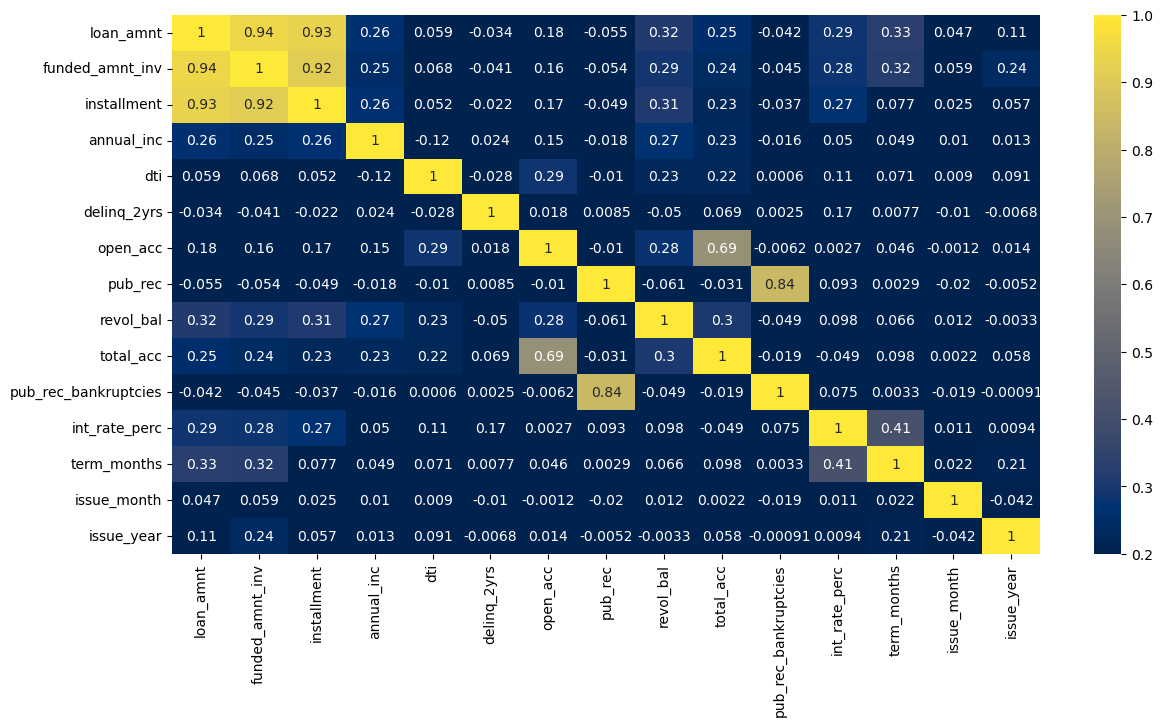

In [109]:
# Ploting correlation plot of fully paid daaset to understand strong and weak corrleations
plt.figure(figsize=(14, 7))
sns.heatmap(filtered_loan_df[filtered_loan_df['loan_status']=="Fully Paid"].corr(), vmin=0.2, annot=True, cmap='cividis')

### <font color=Orange> Observation:

correlation analysis on numerical data of fully paid borrowes show weak correlations between public_rec, Public rec_bankruptcies,revol balance, delinquency,dti. few more columns can be removed as they are mostly neutral


In [110]:
print(filtered_loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   installment           39717 non-null  float64
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_title             37258 non-null  object 
 6   emp_length            38642 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  title                 39706 non-null  object 
 13  addr_state            39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  delinq_2yrs        

#### <font color= DarkBlue> Univariate Analysis, segemnted Analysis for categorical data

In [111]:
## understanding behaviour of different categorical valriables for all loans

categorical_cols=["grade",'sub_grade',"emp_title","emp_length","home_ownership","verification_status","loan_status","purpose","title","addr_state"]
for val in categorical_cols:
    #print(filtered_loan_df[val].value_counts(dropna=False))
    print("Maximum people have a loan of",val,filtered_loan_df[val].value_counts().index[0],filtered_loan_df[val].value_counts()[0],"i.e",round(filtered_loan_df[val].value_counts()[0]*100/filtered_loan_df.shape[0],2),"% of all loans")

Maximum people have a loan of grade B 12020 i.e 30.26 % of all loans
Maximum people have a loan of sub_grade B3 2917 i.e 7.34 % of all loans
Maximum people have a loan of emp_title US Army 134 i.e 0.34 % of all loans
Maximum people have a loan of emp_length 10+ years 8879 i.e 22.36 % of all loans
Maximum people have a loan of home_ownership RENT 18899 i.e 47.58 % of all loans
Maximum people have a loan of verification_status Not Verified 16921 i.e 42.6 % of all loans
Maximum people have a loan of loan_status Fully Paid 32950 i.e 82.96 % of all loans
Maximum people have a loan of purpose debt_consolidation 18641 i.e 46.93 % of all loans
Maximum people have a loan of title Debt Consolidation 2184 i.e 5.5 % of all loans
Maximum people have a loan of addr_state CA 7099 i.e 17.87 % of all loans


In [112]:
print(filtered_loan_df["emp_title"].value_counts())

US Army                                                                           134
Bank of America                                                                   109
IBM                                                                                66
AT&T                                                                               59
Kaiser Permanente                                                                  56
Wells Fargo                                                                        54
USAF                                                                               54
UPS                                                                                53
US Air Force                                                                       52
Walmart                                                                            45
Lockheed Martin                                                                    44
United States Air Force                               

### <font color= Orange> Observations

1. Source of income of around 42.6% of borrowers are not verified by LC.This is a huge number of people and hence chances of default can be reduced with proper verification. This statement will be verified
    
2. Loan status needs to be analysed further
    
3. Professionals with 10+ years work experience make 22.3% of the borrowers 
    
4. Column of emp_title will be dropped as it seems fairly distributed

5. Loan purpose and tiltle will be studied in detail and one can be dropped
    
6. Maximum loans are availed from or in State of CA will be studied with other select categorical variables for default

In [113]:
### filtering the data for defaulters by using loan status = charged off
default_df=filtered_loan_df[filtered_loan_df['loan_status']=="Charged Off"]

In [114]:
### understanding maximum counts of defaulter for different categorical variables

categorical_cols=["grade",'sub_grade',"emp_title","emp_length","home_ownership","verification_status","purpose","title","addr_state"]

for val in categorical_cols:
    print("Top 2 categories of defaults for ",val," are\n",default_df[val].value_counts()[0:2],"\ni.e ",round((default_df[val].value_counts()[0]+default_df[val].value_counts()[1])*100/default_df.shape[0],2),"% which accounts to total defaults under ",val,"\n",sep="")

Top 2 categories of defaults for grade are
B    1425
C    1347
Name: grade, dtype: int64
i.e 49.26% which accounts to total defaults under grade

Top 2 categories of defaults for sub_grade are
B5    356
B3    341
Name: sub_grade, dtype: int64
i.e 12.39% which accounts to total defaults under sub_grade

Top 2 categories of defaults for emp_title are
Bank of America    20
US Army            18
Name: emp_title, dtype: int64
i.e 0.68% which accounts to total defaults under emp_title

Top 2 categories of defaults for emp_length are
10+ years    1331
< 1 year      639
Name: emp_length, dtype: int64
i.e 35.01% which accounts to total defaults under emp_length

Top 2 categories of defaults for home_ownership are
RENT        2839
MORTGAGE    2327
Name: home_ownership, dtype: int64
i.e 91.81% which accounts to total defaults under home_ownership

Top 2 categories of defaults for verification_status are
Not Verified    2142
Verified        2051
Name: verification_status, dtype: int64
i.e 74.52% w

### <font color= Orange> Observations

1. Employee Title, Title will be dropped, Address will be dropped as we now know states with highest default
    
2. Surprisingly Grade B and C observes maximum number of defaults ~50%

3. Better income source verification can reduce the default strongly 

4. Majority of defaults 90% are by borrowers who have a home mortgage or are on Rent 

#### <font color= Darkblue> Segmented and Univariate analysis on numerical data

In [115]:
filtered_loan_df.drop(['addr_state','title', 'emp_title'],inplace=True,axis=1)

In [116]:
print(filtered_loan_df.describe())

          loan_amnt  funded_amnt_inv   installment    annual_inc  \
count  39717.000000     39717.000000  39717.000000  3.971700e+04   
mean   11219.443815     10397.448868    324.561922  6.896893e+04   
std     7456.670694      7128.450439    208.874874  6.379377e+04   
min      500.000000         0.000000     15.690000  4.000000e+03   
25%     5500.000000      5000.000000    167.020000  4.040400e+04   
50%    10000.000000      8975.000000    280.220000  5.900000e+04   
75%    15000.000000     14400.000000    430.780000  8.230000e+04   
max    35000.000000     35000.000000   1305.190000  6.000000e+06   

                dti   delinq_2yrs      open_acc       pub_rec      revol_bal  \
count  39717.000000  39717.000000  39717.000000  39717.000000   39717.000000   
mean      13.315130      0.146512      9.294408      0.055065   13382.528086   
std        6.678594      0.491812      4.400282      0.237200   15885.016641   
min        0.000000      0.000000      2.000000      0.000000      

In [117]:
print(default_df.describe())

          loan_amnt  funded_amnt_inv  installment    annual_inc          dti  \
count   5627.000000      5627.000000  5627.000000  5.627000e+03  5627.000000   
mean   12104.385108     10864.521324   336.175006  6.242730e+04    14.000624   
std     8085.732038      7661.750540   217.051841  4.777601e+04     6.585577   
min      900.000000         0.000000    22.790000  4.080000e+03     0.000000   
25%     5600.000000      5000.000000   168.555000  3.700000e+04     9.050000   
50%    10000.000000      9401.209477   293.870000  5.300000e+04    14.290000   
75%    16500.000000     15000.000000   457.840000  7.500000e+04    19.290000   
max    35000.000000     35000.000000  1305.190000  1.250000e+06    29.850000   

       delinq_2yrs     open_acc      pub_rec      revol_bal    total_acc  \
count  5627.000000  5627.000000  5627.000000    5627.000000  5627.000000   
mean      0.170606     9.178070     0.084770   13514.243647    21.427581   
std       0.534986     4.525937     0.284873   1516

### <font color= Orange> Observations

1. by comparing the describe function it is clear that there are outliers present in certain variables. These will be further checked


<Axes: xlabel='loan_amnt', ylabel='Count'>

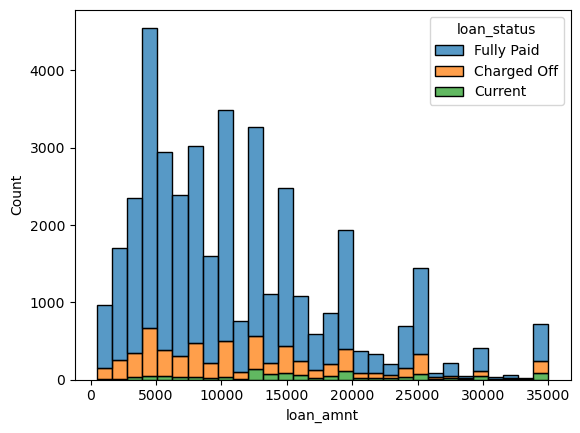

In [118]:
#understand defaulters at different loan bands
sns.histplot(data=filtered_loan_df,bins=30,x="loan_amnt",hue="loan_status",multiple='stack')

<Axes: xlabel='loan_amnt', ylabel='Count'>

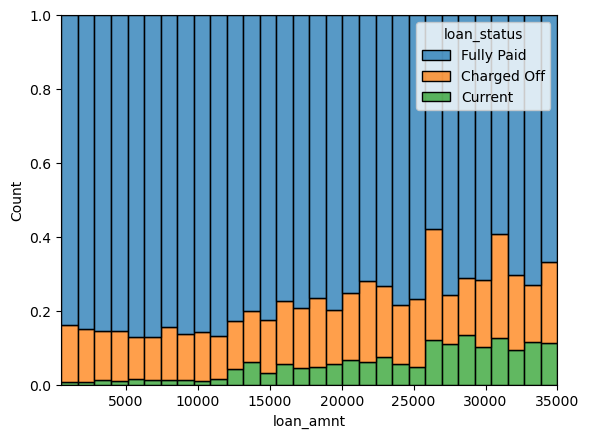

In [119]:
#to understand percentage of defaulters
sns.histplot(data=filtered_loan_df,bins=30,x="loan_amnt",hue="loan_status",multiple='fill')

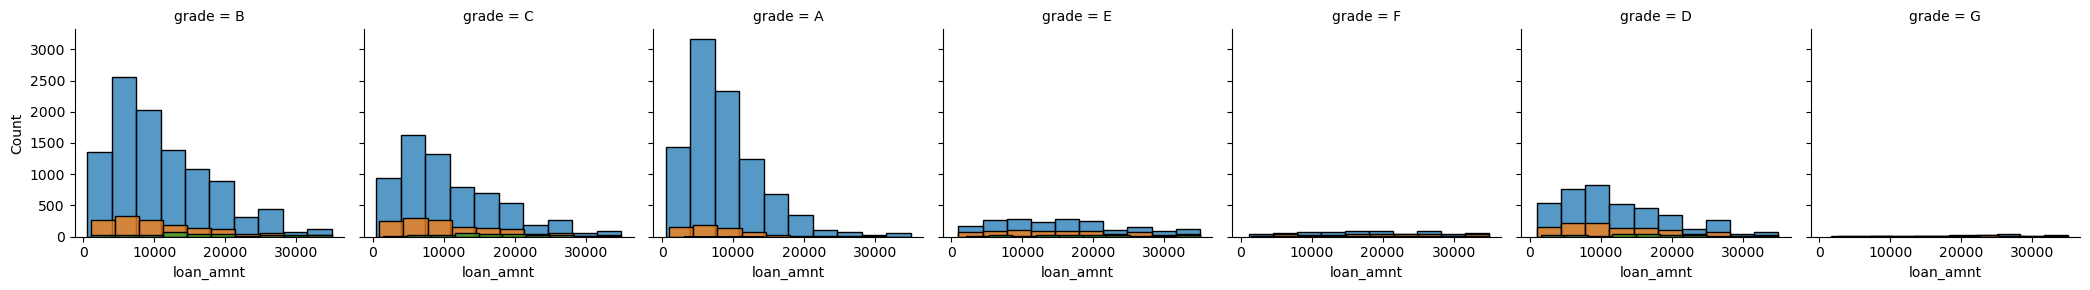

In [120]:
g = sns.FacetGrid(filtered_loan_df,aspect=1, col="grade", hue="loan_status")
g.map(sns.histplot, "loan_amnt",bins=10)

### <font color= Orange> Observations

After Grade D the % of defaults increase in almost all bands

The histogram shows that defaults are comparitvely higher above 15000. This may not be represntative as 75% of data lies below 15000 for loan amount
    
In current scenario high amount borrowers are more and hence caution adviced


#### <font color= DarkBlue> Removing Outliers: as a general rule 95 percentile is used

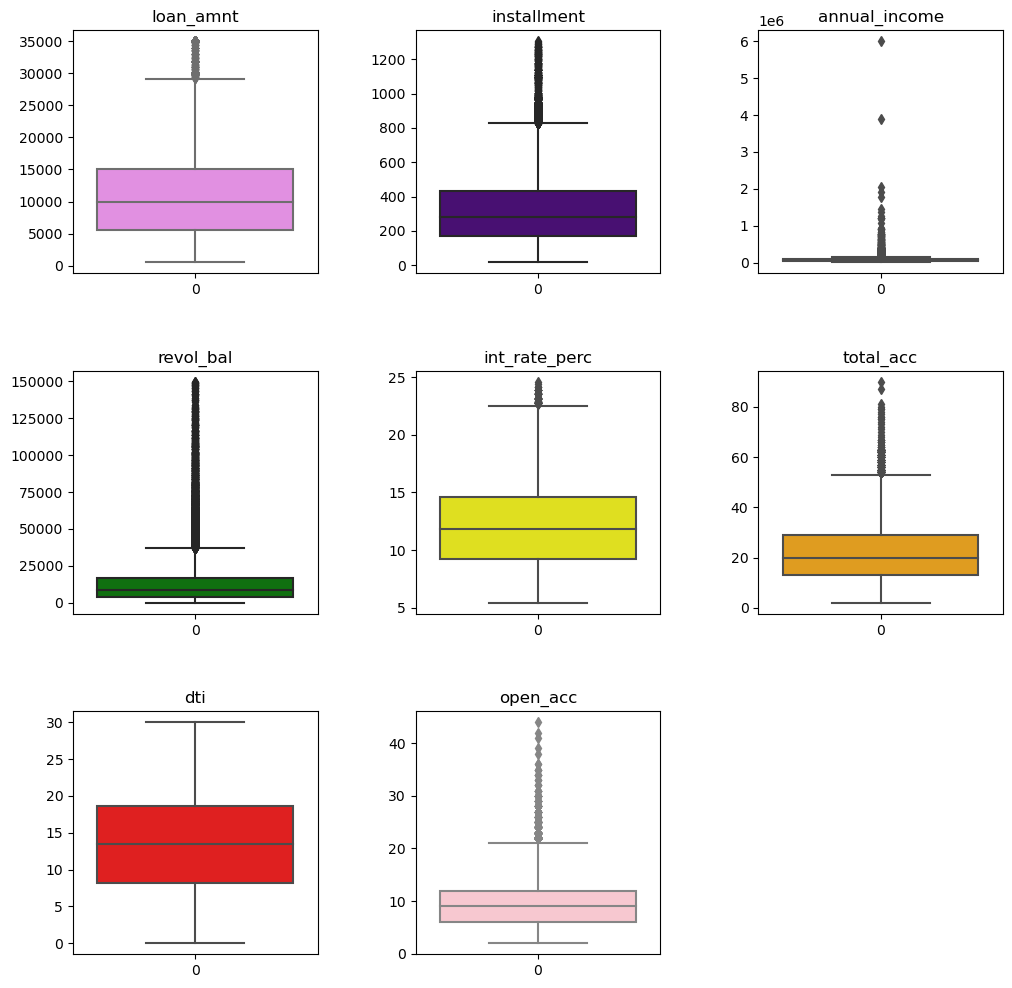

In [121]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.boxplot(filtered_loan_df['loan_amnt'],ax=ax,color='violet').set(title='loan_amnt')
ax = fig.add_subplot(3, 3, 2)
sns.boxplot(filtered_loan_df['installment'],ax=ax,color='indigo').set(title='installment')
ax = fig.add_subplot(3, 3, 3)
sns.boxplot(filtered_loan_df['annual_inc'],ax=ax,color='blue').set(title='annual_income')
ax = fig.add_subplot(3, 3, 4)
sns.boxplot(filtered_loan_df['revol_bal'],ax=ax,color='green').set(title='revol_bal')
ax = fig.add_subplot(3, 3, 5)
sns.boxplot(filtered_loan_df['int_rate_perc'],ax=ax,color='yellow').set(title='int_rate_perc')
ax = fig.add_subplot(3, 3, 6)
sns.boxplot(filtered_loan_df['total_acc'],ax=ax,color='orange').set(title='total_acc')
ax = fig.add_subplot(3, 3, 7)
sns.boxplot(filtered_loan_df['dti'],ax=ax,color='red').set(title='dti')
ax = fig.add_subplot(3, 3, 8)
sns.boxplot(filtered_loan_df['open_acc'],ax=ax,color='pink').set(title='open_acc')
plt.show()

In [122]:
# removing annual income outliers as high income individuals are more likely to pay and aslo describe function of defaulters df supports the claim
filtered_loan_df= filtered_loan_df[filtered_loan_df.annual_inc <= filtered_loan_df['annual_inc'].quantile(0.95)]
print(filtered_loan_df.shape)

(37743, 22)


[Text(0.5, 1.0, 'annual_income')]

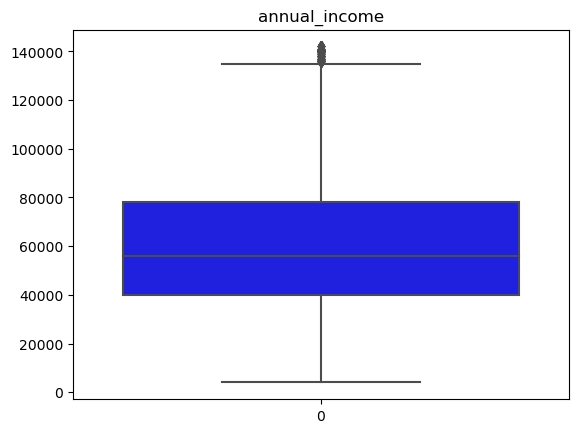

In [123]:
sns.boxplot(filtered_loan_df['annual_inc'],color='blue').set(title='annual_income')

C:\Users\dell\AppData\Local\Temp\ipykernel_26360\601966280.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_loan_df.corr(), vmin=0.2, annot=True, cmap='cividis',ax=ax).set(title="all_data")
C:\Users\dell\AppData\Local\Temp\ipykernel_26360\601966280.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(default_df.corr(), vmin=0.2, annot=True, cmap='cividis',ax=ax).set(title="defaulters")


[Text(0.5, 1.0, 'defaulters')]

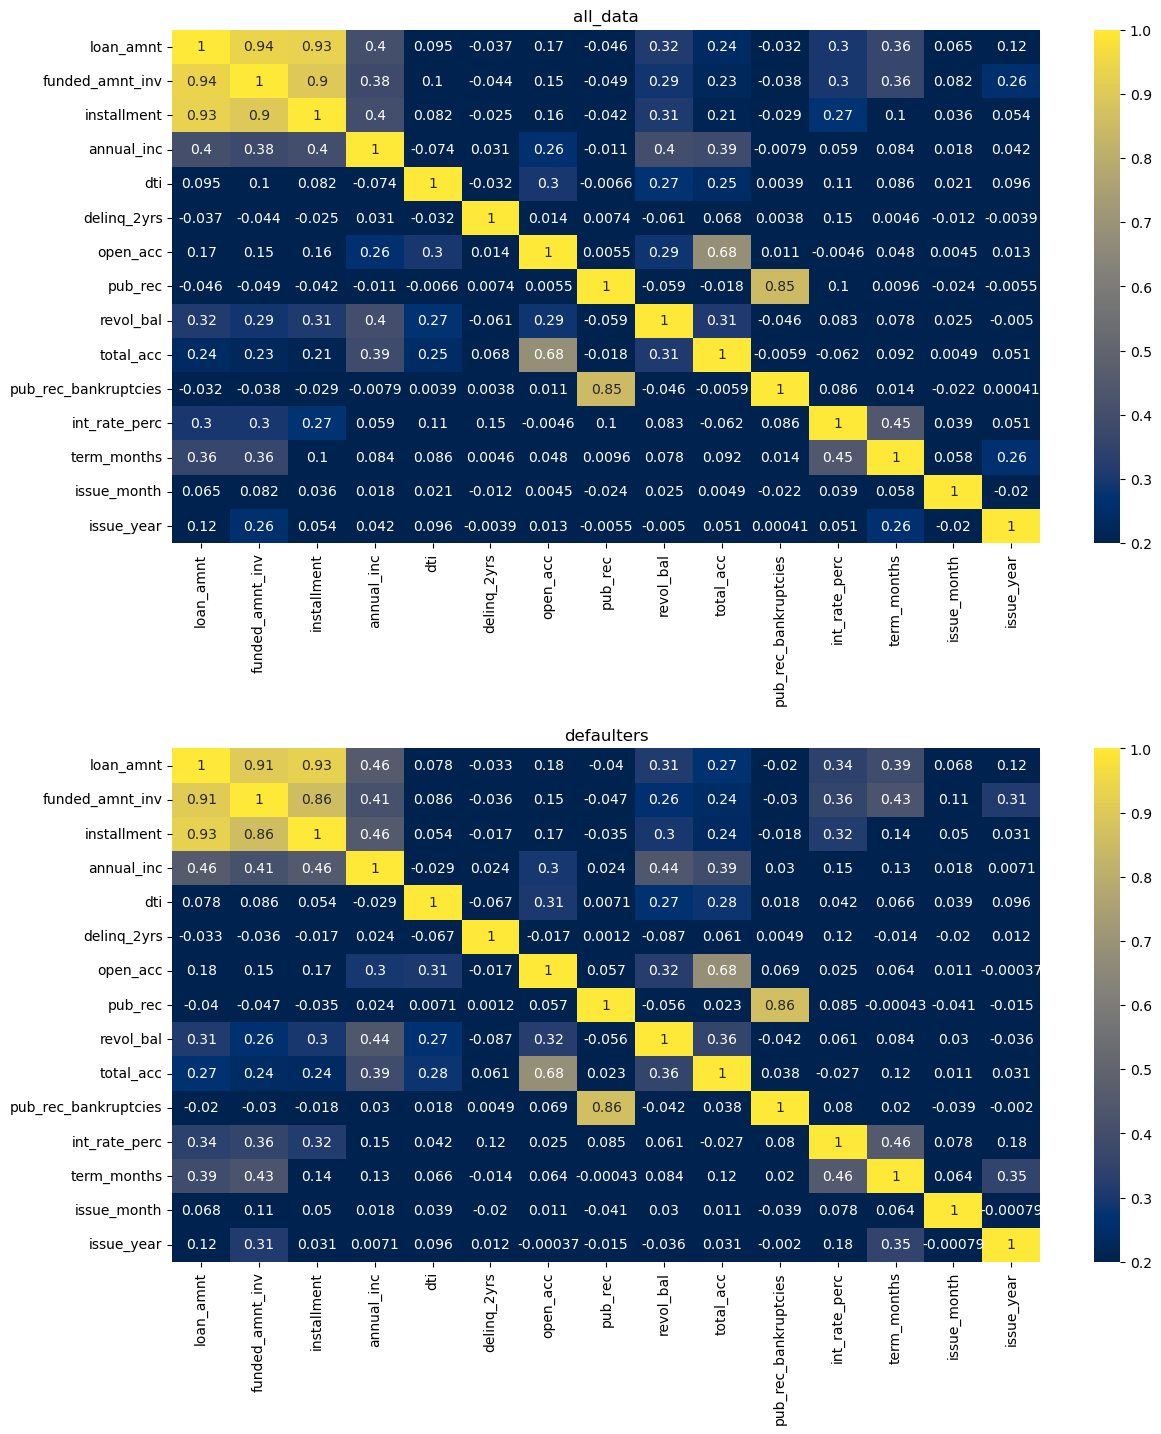

In [124]:
## replotting correlation plots for defaulters and filtered df
default_df=filtered_loan_df[filtered_loan_df['loan_status']=="Charged Off"]

fig = plt.figure(figsize=(14, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 1, 1)
sns.heatmap(filtered_loan_df.corr(), vmin=0.2, annot=True, cmap='cividis',ax=ax).set(title="all_data")
ax = fig.add_subplot(2, 1, 2)
sns.heatmap(default_df.corr(), vmin=0.2, annot=True, cmap='cividis',ax=ax).set(title="defaulters")

### <font color= Orange> Observations

Strong correlations are observed between certain entires and the likelyhood of defaults are more

Public_record- Public _rec_Bankruptcies

Total acc-open acc

annual income-loan amount-installment-revol balance

Installment-loan amount

Term months-Interest rate perc

<Axes: xlabel='issue_year', ylabel='count'>

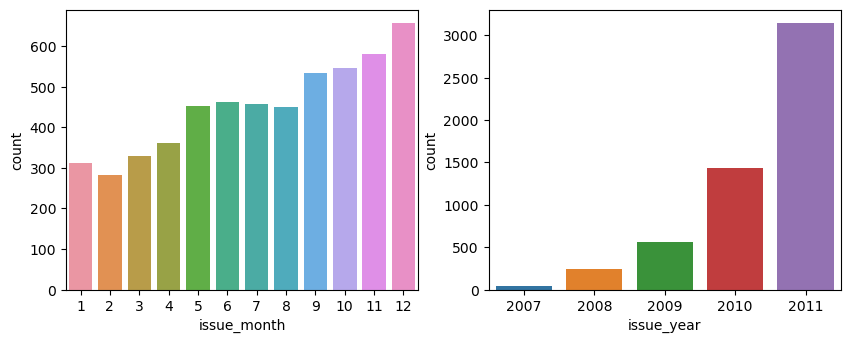

In [125]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x='issue_month', data=filtered_loan_df[filtered_loan_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=filtered_loan_df[filtered_loan_df['loan_status']=='Charged Off'])

### <font color= Orange> Observations

Highest loan availed was in 2011 and highest loan availing quarter was Q4 (in all years)

Loan applicants are incresing YoY almost in exponential manner

### <font color= Darkblue> Bivariate Analysis 

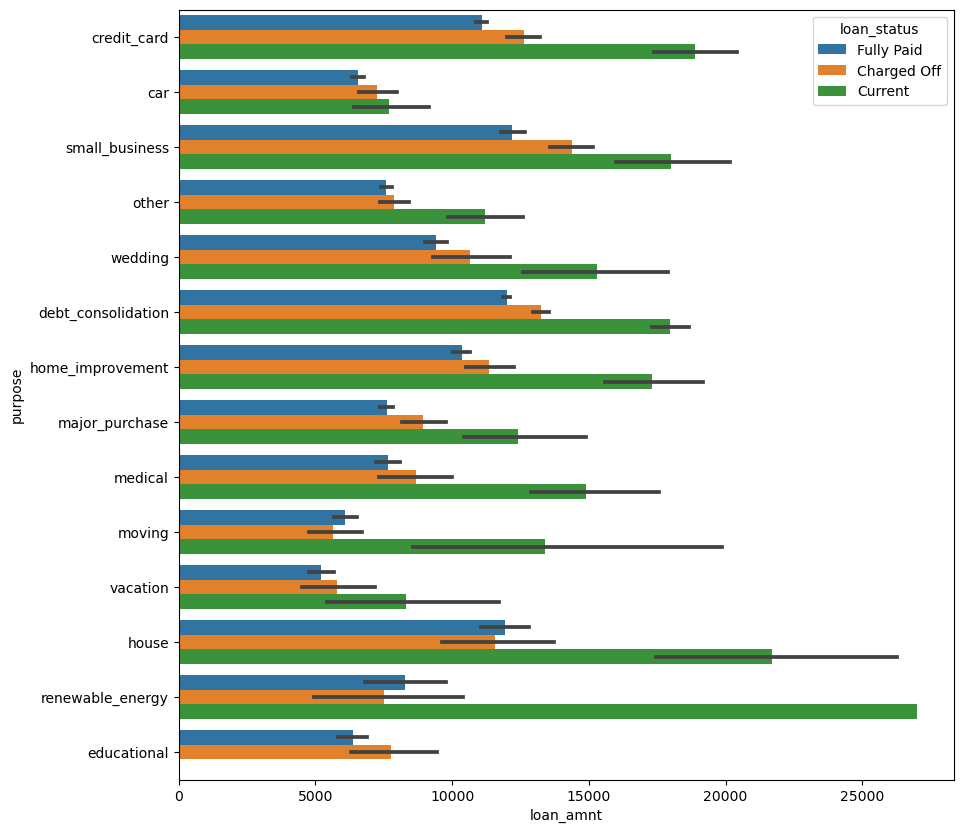

In [126]:
# 1. To understand Loan taken for what purpose can lead to most defaults
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_loan_df,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

In [127]:
#2. Highest defulters belong to which employment length 

Emp_tenure_default = filtered_loan_df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack()
Emp_tenure_default.sort_values(by="Charged Off",ascending=True)

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
9 years,150,31,1004
8 years,194,40,1151
7 years,252,58,1392
6 years,295,57,1781
5 years,441,81,2607
4 years,443,90,2759
1 year,449,66,2598
3 years,537,76,3293
2 years,548,91,3557


In [128]:
#3. to understand behavior of defaulters for various numerical data categories

pd.pivot_table(filtered_loan_df,index="loan_status",aggfunc=np.median).iloc[0:3:2]

C:\Users\dell\AppData\Local\Temp\ipykernel_26360\4134145643.py:3: FutureWarning: The operation <function median at 0x0000024B8A1E3B50> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  pd.pivot_table(filtered_loan_df,index="loan_status",aggfunc=np.median).iloc[0:3:2]


,annual_inc,delinq_2yrs,dti,funded_amnt_inv,installment,int_rate_perc,issue_month,issue_year,loan_amnt,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,term_months,total_acc
loan_status,,,,,,,,,,,,,,,
Charged Off,51996.0,0,14.40,9000.0,286.99,13.49,8,2011,10000,8,0,0.0,8926,36,19
Fully Paid,57000.0,0,13.43,8200.0,267.74,11.49,7,2011,9000,8,0,0.0,8418,36,20


In [129]:
#4. defaulters for grade and highest subgrade

pd.pivot_table(filtered_loan_df,index="loan_status",values='sub_grade',columns="grade",aggfunc=stats.mode)

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1668: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,"([A5], [213])","([B5], [349])","([C1], [328])","([D2], [264])","([E1], [185])","([F1], [80])","([G1], [30])"
Current,"([A5], [26])","([B3], [89])","([C1], [78])","([D4], [61])","([E2], [39])","([F1], [18])","([G1], [9])"
Fully Paid,"([A4], [2579])","([B3], [2332])","([C1], [1637])","([D2], [959])","([E1], [490])","([F1], [196])","([G1], [58])"


In [130]:
#5. defaulters for term and interest

pd.pivot_table(filtered_loan_df,index="loan_status",values='int_rate_perc',columns='term_months',aggfunc=np.median)

term_months,36,60
loan_status,,
Charged Off,12.53,15.99
Current,NaN,14.27
Fully Paid,10.75,14.17


In [131]:
#6. defaulters for intrest rate and installment

pd.pivot_table(filtered_loan_df,index="loan_status",values='installment',columns=pd.cut(filtered_loan_df.int_rate_perc,bins=[0,5,10,15,20,25],labels=['0-5%','5-10%','10-15%','15-20%','20-25%']),aggfunc=np.median).iloc[0:3:2]

int_rate_perc,5-10%,10-15%,15-20%,20-25%
loan_status,,,,
Charged Off,210.325,268.52,347.98,534.235
Fully Paid,224.630,274.48,347.79,539.840


In [132]:
cols= ['open_acc','total_acc','pub_rec_bankruptcies','pub_rec','annual_inc','installment','revol_bal','int_rate_perc', "term_months"]
for vals in cols:
    print("for the category ",vals, "\n",filtered_loan_df.groupby(filtered_loan_df['loan_status'])[vals].describe(),"\n",sep="")

for the category open_acc
               count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   5421.0  9.097952  4.471001  2.0  6.0  8.0  11.0  38.0
Current       1054.0  9.782732  4.217862  2.0  7.0  9.0  12.0  32.0
Fully Paid   31268.0  9.180536  4.331824  2.0  6.0  8.0  12.0  44.0

for the category total_acc
               count       mean        std  min   25%   50%   75%   max
loan_status                                                            
Charged Off   5421.0  21.130234  11.313334  2.0  12.0  19.0  28.0  74.0
Current       1054.0  22.824478  10.246187  3.0  15.0  22.0  29.0  63.0
Fully Paid   31268.0  21.736248  11.218656  2.0  13.0  20.0  28.0  90.0

for the category pub_rec_bankruptcies
               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   5309.0  0.068751  0.254539  0.0  0.0  0.0  0.0  2.0
Current  

### <font color= Orange> Obsevation

1. People are likely to avial loans and default when puropse of loan is small business, credit card hence these claims need to verified and evaluated thoroughly

2. Those who are less than a year of work experience are likely to default. this is as expected 

3. people with more thatn 10 yrs rexperience are likely to default this needs to be investigated by LC

4. if intrest rate and term is more the default percentage is more

5. Same with high intrest rate and installment.


## <font color= GREEN> CONCLUSION

Categories which can increase risk of default by borrowers are

1. median annual income less than ~52000 

2. Home ownership- Rented or Mortgaged

3. Employemnt tenure is less than a year or more than 10 years

4. Loan application for amount more than 15000

5. Purpose of loan being for Debt consolidation, small business, credit card

6. Higher loan tenure borrowers i.e 60 months and higher installments have a higher default percentage

7. Most defaulting states are CA and FL can attract marginally higher intrest rates

8. Gade of D E F have a very high default count

9. Dti ratio of above ~14

10. Source not verified is the biggest cause in 74% of all defaults

